**Gaussian Mixture Model clustering algorithm**

The objective of this assignent is to utilize gaussian mixture algorithm to do clustering analysis on the walmart sales dataset.

Here, we are focusing on three main features from the dataset which are Item_visibility, Item_MRP and Outlet_Sales.

Generally, It is very difficult to track customer's interest in particular product. This is our small effort to visualize the observed data based on the product's visibility, MRP value and their respective sales. 

Steps followed:


1.   Data preparation and Cleaning
2.   Apply GMM clustering algorithms
3.   Conclude the results based on clusters


  


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.mixture import GaussianMixture

In [0]:
# Importing the dataset
dataset = pd.read_csv("/content/drive/My Drive/Clustering/data.csv")

In [0]:
dataset.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
#Slicing the dataset
X = dataset.iloc[:, [3,5,11]].values

In [0]:
#convert the dataset into dataframe
 
d = pd.DataFrame(X) 

In [0]:
gmm = GaussianMixture(n_components = 4)
gmm.fit(d) 

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [0]:
# Assign a label to each sample 
labels = gmm.predict(d) 
d['labels']= labels 
d0 = d[d['labels']== 0] 
d1 = d[d['labels']== 1] 
d2 = d[d['labels']== 2]

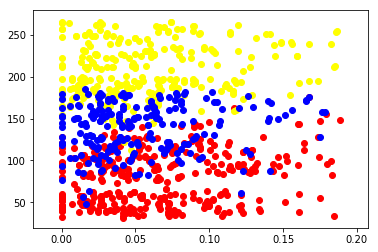

In [0]:
  
# plot three clusters in same plot 
plt.scatter(d0[0], d0[1], c ='r') 
plt.scatter(d1[0], d1[1], c ='yellow') 
plt.scatter(d2[0], d2[1], c ='b')  

After visualizing the clusters formed by GMM, we can clearly figure out that item price and its placing on the shelves plays an important role on the overall product sales. These attributes represents the colours in the above graph. The data is scattered but we can figure out that the higher the price is the greater the sales will be and product visibility directly affect the buying choices of the customers.


In comparision with k-means, I found out that visual analysis is easier in k-means than in GMM. K-means tries to group the data according to the values and scale them linearly. The eucladian distances makes sense in some of the scenarios but not always. The gaussian distribution tries to predict the data effectively than k-means. 